In [59]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
%matplotlib inline

In [52]:
red_wines = pd.read_csv("../data/winequality-red.csv", sep=';', index_col='name')
white_wines = pd.read_csv("../data/winequality-white.csv", sep=';', index_col='name')

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, w0000 to w4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5+ KB


In [149]:
n_bins = 20
x = 'citric acid'
y = 'volatile acidity'

int_x = np.linspace(min(red_wines[x]), max(red_wines[x]), n_bins+1)
int_y = np.linspace(min(red_wines[y]), max(red_wines[y]), n_bins+1)
int_x[-1] += 0.01
int_y[-1] += 0.01
red_wines['idx_x'] = np.digitize(red_wines[x], int_x)-1
red_wines['idx_y'] = np.digitize(red_wines[y], int_y)-1
av = red_wines.groupby(['idx_x', 'idx_y'])['quality'].mean()
counts = red_wines.groupby(['idx_x', 'idx_y'])['quality'].count()

In [150]:
matrix = np.zeros((n_bins, n_bins))*np.nan
xs = np.array(av.index.levels[0])[av.index.labels[0]]
ys = np.array(av.index.levels[1])[av.index.labels[1]]
matrix[xs, ys] = av.values

AttributeError: 'AxesSubplot' object has no attribute 'set_xtick_labels'

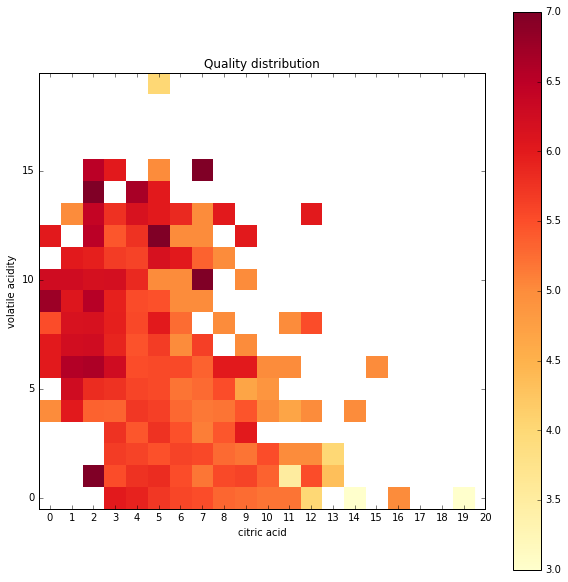

In [160]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.imshow(matrix, cmap=plt.cm.YlOrRd, interpolation='nearest')
plt.gca().invert_yaxis();
plt.colorbar();
plt.xlabel(x)
plt.ylabel(y)
plt.title('Quality distribution')
ax.set_xticks(range(len(int_x)))
ax.set_xtick_labels(int_x)